#IMPORTING

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC

#Functions

In [2]:
def generate_X_test(df):

  min_F1=df["F1"].min()
  min_F2=df["F2"].min()


  max_F1=df["F1"].max()
  max_F2=df["F2"].max()
  step = 1
  radius = 5

  x_values = np.arange(min_F1, max_F1 + step, step)
  y_values = np.arange(min_F2, max_F2 + step, step)


  x_mesh, y_mesh, = np.meshgrid(x_values, y_values)

  x_flat = x_mesh.flatten()
  y_flat = y_mesh.flatten()


  x_test = np.column_stack((x_flat, y_flat))
  return x_test


#THE CLASSIFIER

**Please Choose a number to the dataset name**

In [35]:
DATASETS ={
    1: "Aggregation",
    2:"Compound",
    3:"Flame",
    4:"Jain",
    5:"Pathbased",
    6:"Spiral"
}

choosen=DATASETS[5]

In [36]:
colnames=["F1","F2","class"]
df = pd.read_csv(f"/content/drive/MyDrive/DATASET/ML DATA/{choosen}.txt", skiprows=7, sep='\t', names=colnames)

In [37]:
Y=df["class"]
X=df.drop(columns=["class"])

In [38]:
C_values = [0.1, 1, 10, 100]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


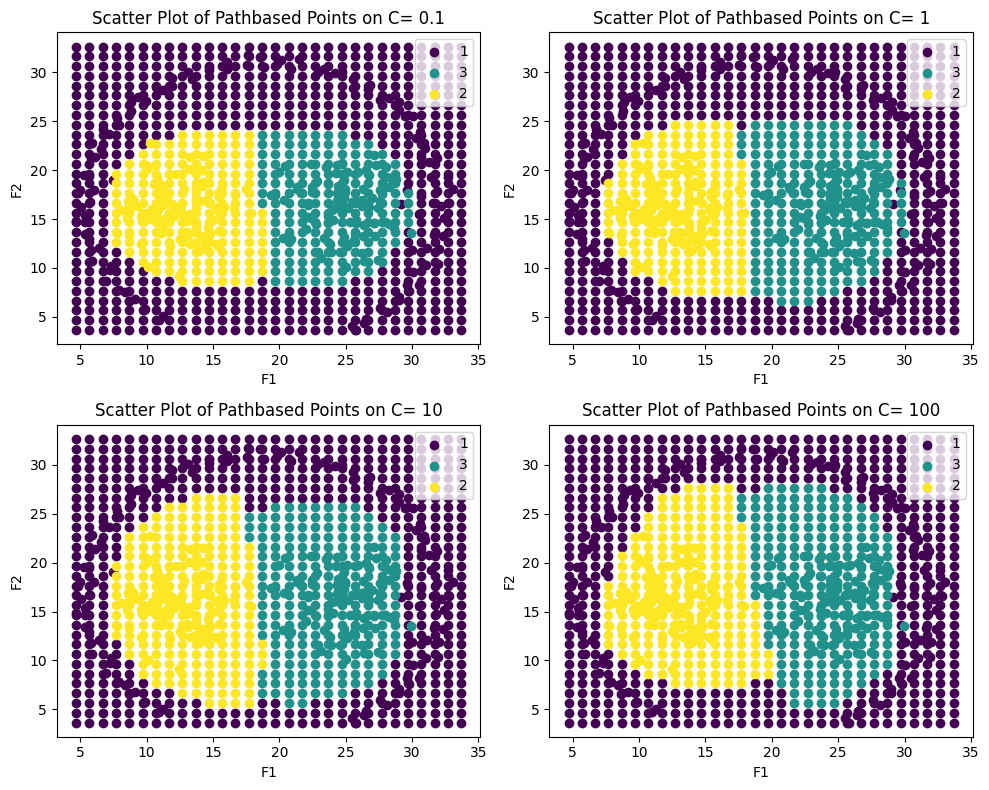

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
X_gen_test=generate_X_test(df.drop(columns="class"))


for i, C in enumerate(C_values):
    row = i // 2
    col = i % 2

    svm = SVC(C=C, kernel='rbf')
    svm.fit(X, Y)
    finalRep = pd.DataFrame({'F1': X_gen_test[:, 0], 'F2':  X_gen_test[:, 1]})
    Y_pred = svm.predict(X_gen_test)
    finalRep.insert(2, 'class', Y_pred)
    finalRep = pd.concat([df,finalRep], axis=0)

    unique_classes = finalRep['class'].unique()

    num_colors = len(unique_classes)
    colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

    for class_name, color in zip(unique_classes, colors):
        axs[row, col].scatter(finalRep[finalRep['class'] == class_name]['F1'], finalRep[finalRep['class'] == class_name]['F2'], label=class_name, color=color)

    axs[row, col].set_xlabel('F1')
    axs[row, col].set_ylabel('F2')
    axs[row, col].set_title(f'Scatter Plot of {choosen} Points on C= {C}')
    axs[row, col].legend()


plt.tight_layout()


plt.show()


#STATS

In [ ]:
models =['rbf',]

In [121]:
for i in range(len(DATASETS)):
  for c in C_values:
    colnames=["F1","F2","class"]
    df = pd.read_csv(f"/content/drive/MyDrive/DATASET/ML DATA/{DATASETS[i+1]}.txt", skiprows=7, sep='\t', names=colnames)
    Y=df["class"]
    X=df.drop(columns=["class"])
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y ,test_size=0.2, random_state=42)
    svm = SVC(C=c, kernel='rbf')
    svm.fit(X_train, Y_train)
    accuracy = svm.score(X_test, Y_test)
    print(f" FOR RBF MODEL ON {DATASETS[i+1]} and C = {c} the accuracy is : ",accuracy*100," % ")


 FOR Aggregation and C = 0.1 the accuracy is :  97.46835443037975  % 
 FOR Aggregation and C = 1 the accuracy is :  98.73417721518987  % 
 FOR Aggregation and C = 10 the accuracy is :  98.73417721518987  % 
 FOR Aggregation and C = 100 the accuracy is :  99.36708860759494  % 
 FOR Compound and C = 0.1 the accuracy is :  78.75  % 
 FOR Compound and C = 1 the accuracy is :  90.0  % 
 FOR Compound and C = 10 the accuracy is :  92.5  % 
 FOR Compound and C = 100 the accuracy is :  98.75  % 
 FOR Flame and C = 0.1 the accuracy is :  97.91666666666666  % 
 FOR Flame and C = 1 the accuracy is :  100.0  % 
 FOR Flame and C = 10 the accuracy is :  100.0  % 
 FOR Flame and C = 100 the accuracy is :  100.0  % 
 FOR Jain and C = 0.1 the accuracy is :  96.0  % 
 FOR Jain and C = 1 the accuracy is :  98.66666666666667  % 
 FOR Jain and C = 10 the accuracy is :  100.0  % 
 FOR Jain and C = 100 the accuracy is :  100.0  % 
 FOR Pathbased and C = 0.1 the accuracy is :  96.66666666666667  % 
 FOR Pathba

In [123]:
for i in range(len(DATASETS)):
  for c in C_values:
    colnames=["F1","F2","class"]
    df = pd.read_csv(f"/content/drive/MyDrive/DATASET/ML DATA/{DATASETS[i+1]}.txt", skiprows=7, sep='\t', names=colnames)
    Y=df["class"]
    X=df.drop(columns=["class"])
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y ,test_size=0.2, random_state=42)
    svm = SVC(C=c, kernel='poly', degree=3)
    svm.fit(X_train, Y_train)
    accuracy = svm.score(X_test, Y_test)
    print(f" FOR POLY MODEL ON {DATASETS[i+1]} and C = {c} the accuracy is : ",accuracy*100," % ")

 FOR POLY MODEL ON Aggregation and C = 0.1 the accuracy is :  98.73417721518987  % 
 FOR POLY MODEL ON Aggregation and C = 1 the accuracy is :  99.36708860759494  % 
 FOR POLY MODEL ON Aggregation and C = 10 the accuracy is :  99.36708860759494  % 
 FOR POLY MODEL ON Aggregation and C = 100 the accuracy is :  100.0  % 
 FOR POLY MODEL ON Compound and C = 0.1 the accuracy is :  86.25  % 
 FOR POLY MODEL ON Compound and C = 1 the accuracy is :  88.75  % 
 FOR POLY MODEL ON Compound and C = 10 the accuracy is :  88.75  % 
 FOR POLY MODEL ON Compound and C = 100 the accuracy is :  88.75  % 
 FOR POLY MODEL ON Flame and C = 0.1 the accuracy is :  97.91666666666666  % 
 FOR POLY MODEL ON Flame and C = 1 the accuracy is :  100.0  % 
 FOR POLY MODEL ON Flame and C = 10 the accuracy is :  100.0  % 
 FOR POLY MODEL ON Flame and C = 100 the accuracy is :  100.0  % 
 FOR POLY MODEL ON Jain and C = 0.1 the accuracy is :  90.66666666666666  % 
 FOR POLY MODEL ON Jain and C = 1 the accuracy is :  92.